<h1 align="center">Logistic Regression: Multiclass Classification</h1>

Indentification of digits from images

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

### Import digits dataset from sklearn

In [3]:
digits = load_digits()

### Now this training set contains some elements as follows

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### images contains images of different digits

<Figure size 432x288 with 0 Axes>

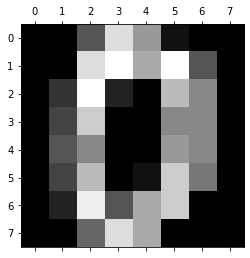

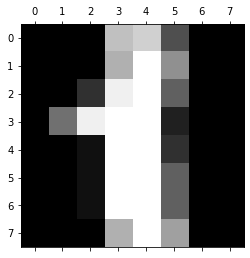

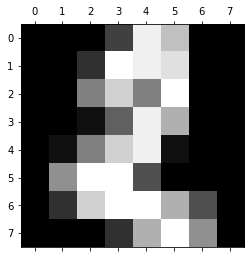

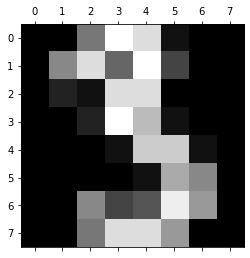

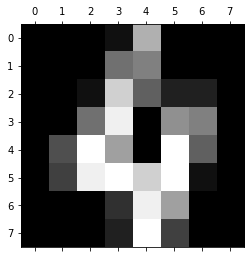

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

### Target is the correct digit which is present in an image

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

### Now we'll import train_test_split to split our dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train, y_train, sample_weight=None)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model.score(X_test, y_test)

0.9555555555555556

### Now we'll predict the digit of an image at position 67 in digits array and our model predicted it to be 6

In [13]:
model.predict([digits.data[67]])

array([6])

### Lets check out the image and see if our model has predicted correctly

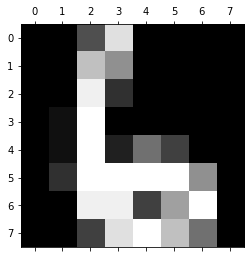

In [18]:
plt.matshow(digits.images[67])

### Now predict all values from 0 - 5

In [39]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Now we'll create a confusion matrix
confusion matrix is a matrix where we can see where our model is making a mistake.

In [43]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 30,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 40,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 25,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 36]], dtype=int64)

### To show it in a nice graphical way

Text(69.0, 0.5, 'Truth')

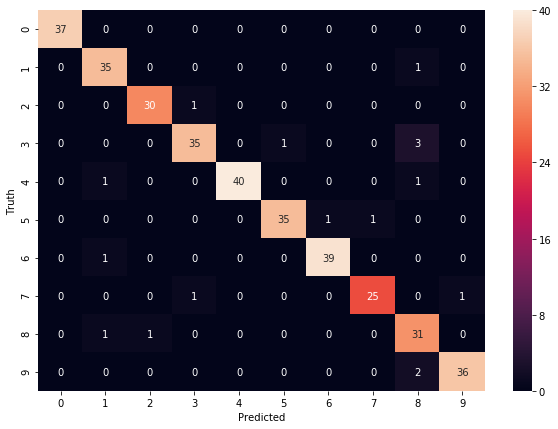

In [46]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')